<a href="https://colab.research.google.com/github/Simos-Sigurd/data-science/blob/main/Fundamentos_de_Ci%C3%AAncia_de_Dados_1_IC171022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos de Ciência de Dados - K-Means

*   **Autor:** Igor de Carvalho
*   **Data:** 17/10/2022
*   **Descrição:** Este programa faz a leitura de um conjunto de dados em .CSV e demonstra uma aplicação do algoritmo KMeans.

---

**Etapas do código:**

1.   Importar as biblotecas necessárias
2.   Leitura da base de dados em arquivo .CSV
3.   Aplicar o algoritmo K-Means com 2 e 6 clusters, plotando os gráficos para demonstrar as diferenças
4.   Aplicar método WCSS para encontrar o número ideal de clusters, demonstrando o "Gráfico de cotovelo"
5.   Executar o K-Means novamente, agora com o número ideal de clusters

**Observações:**

*   As dimensões dos gráficos foram prédefindas com o parâmetro `figsize(10, 5)` para uma melhor visualização.
*   Todos os clusters estão separados por cores, com seus centróides (pontos centrais) exibidos em vermelho.


### *1 - Importação das bibliotecas necessárias.*

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### *2 - Realizando a leitura da base de dados*

In [7]:
#Se necessário, trocar o caminho do arquivo.
url = "https://raw.githubusercontent.com/Simos-Sigurd/data-science/main/Consumo.csv?token=GHSAT0AAAAAACDX6AVDCZ6E72FBMXODVEJKZEEUWVQ"
df = pd.read_csv(url, sep=",", encoding="1252")
df.head() #Exibindo o cabeçalho do dataset para verificar formatação.

,Cod,Sexo,Idade,Salario Anual (milhares),Score Gastos (0-100)
0,1,Masculino,19,17,39
1,2,Masculino,21,17,81
2,3,Feminino,20,19,6
3,4,Feminino,23,19,77
4,5,Feminino,31,20,40


### *3 - Aplicando o K-Means com 2 e 6 clusters.*

Antes de aplicar o K-Means, vamos plotar o gráfico de dispersão que demonstra um comparativo de Renda Anual x Score (Pontuação) dos Gastos.

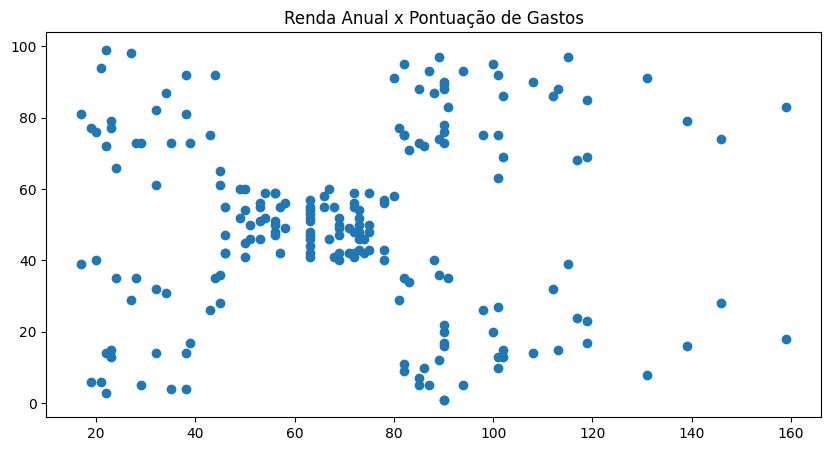

In [8]:
plt.figure(figsize = (10, 5))
plt.scatter(x = "Salario Anual (milhares)", y = "Score Gastos (0-100)", data = df)
plt.title("Renda Anual x Pontuação de Gastos") #personaliza o título do gráfico
plt.show()

Analisando o gráfico podemos perceber que alguns dados tendem a ficar agrupados. O K-Means realiza justamente o agrupamento dos dados, em torno de centróides (centros de dados), criando o que chamamos de *clustering* - efeito de particionar *n* observações em *k* grupos, onde cada observação pertence ao grupo mais próximo da média. Isso resulta em uma divisão visual no gráfico, facilitando a análise.

Abaixo vemos a aplicação do K-Means com 2 Clusters, em seguida plotamos novamente o gráfico *Renda x Pontuação* para ver como os dados ficam agrupados.

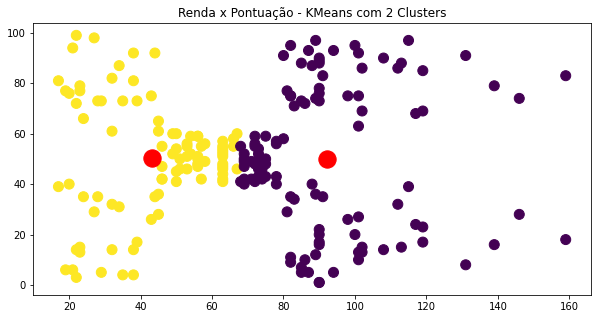

In [ ]:
X2 = df[["Salario Anual (milhares)", "Score Gastos (0-100)"]].iloc[:,:].values

kmeans = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10)
pred_y = kmeans.fit_predict(X2)

plt.figure(figsize = (10, 5))
plt.scatter(x = "Salario Anual (milhares)", y = "Score Gastos (0-100)", data = df, c = pred_y, s = 100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "red")
plt.title("Renda x Pontuação - KMeans com 2 Clusters")
plt.show()

Vejamos agora o K-Means com 6 clusters, novamente plotando o gráfico anterior para ver como fica o agrupamento dos dados.

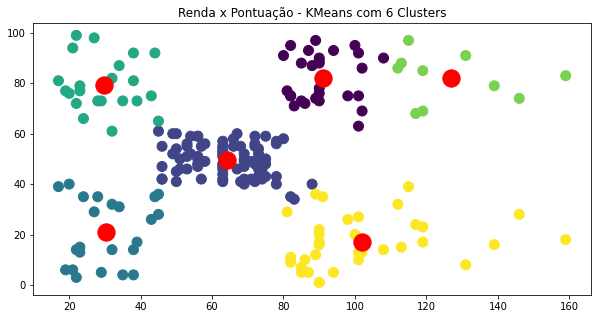

In [ ]:
X6 = df[["Salario Anual (milhares)", "Score Gastos (0-100)"]].iloc[:,:].values

kmeans = KMeans(n_clusters = 6, init="k-means++", max_iter = 300, n_init = 10)
pred_y = kmeans.fit_predict(X6)

plt.figure(figsize = (10, 5))
plt.scatter(x = "Salario Anual (milhares)", y = "Score Gastos (0-100)", data = df, c = pred_y, s = 100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "red")
plt.title("Renda x Pontuação - KMeans com 6 Clusters")
plt.show()

### *4 - Aplicando Método do Cotovelo para encontrar o número ideal de clusters.*

> Observamos nos casos acima o potencial do K-Means, porém um pequeno problema precisa ser observado: para utilizar o K-Means é necessário informar a quantidade de clusters com a qual ele vai trabalhar. Não é ideal que utilizemos números arbitrários para isso, aliás existe uma quantidade ideal de clusters que nossas amostras podem formar. Para descobrir essa quantidade é comumente utilizado um método chamado de **Método do Cotovelo**.

> A ideia por trás desse método é rodar o K-Means para várias quantidades diferentes de clusters e dizer qual dessas quantiades é o número ótimo de clusters para nossa amostra.

> Como o K-Means calcula a distância das observações até o centro do agrupamento que ela pertence, o ideal é que essa distância seja a menor viável. Matematicamente falando, nós estamos buscando uma quantidade de agrupamentos em que a soma dos quadrados intra-clusters (ou do inglês within-clusters sum-of-squares, comumente abreviado para WCSS) seja a menor possível, sendo zero o resultado ótimo.

> A biblioteca Scikit-Learn já calcula o WCSS para nós, através do método *inertia*. Vamos aplicá-lo em nossa amostra e plotar o gráfico Curva de Cotovelo para identificar o número ótimo de clusters:

In [ ]:
wcss = []

for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init="k-means++", max_iter = 300, n_init = 10) #aplica o K-Means variando o número de clusters de 1 até 20
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_) #aplica o método inertia para calcular o WCSS

Plotando gráfico cotovelo.

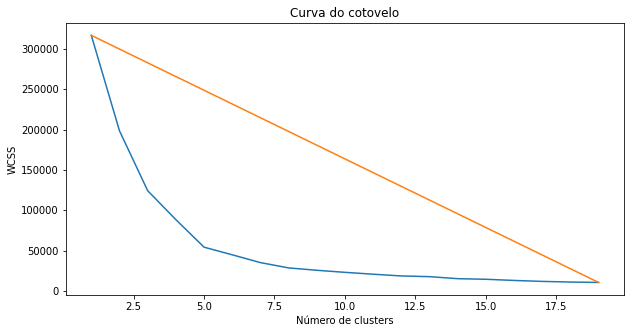

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(range(1, 20), wcss)
plt.plot([1, 19], [wcss[0], wcss[len(wcss) - 1]])
plt.title("Curva do cotovelo")         
plt.xlabel("Número de clusters")        #personaliza o título do eixo X      
plt.ylabel("WCSS")                      #personaliza o título do eixo y
plt.show()

Podemos ver que, para nossa amostra, o número ideal de clusters é **5 (cinco)**. Vamos então aplicar novamente o K-Means com 5 clusters e plotar o gráfico novamente.

### *5 - Aplicando o K-Means com número ideal de clusters.*

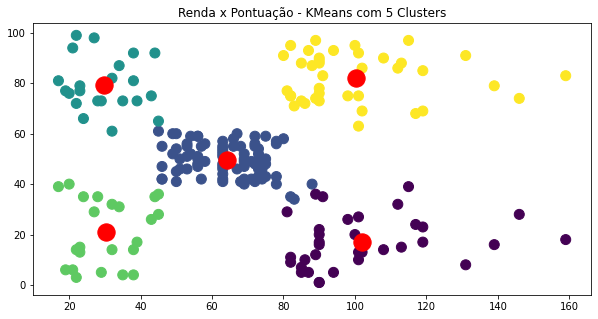

In [ ]:
X5 = df[["Salario Anual (milhares)", "Score Gastos (0-100)"]].iloc[:,:].values

kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 300, n_init = 10)
pred_y = kmeans.fit_predict(X5)

plt.figure(figsize = (10, 5))
plt.scatter(x = "Salario Anual (milhares)", y = "Score Gastos (0-100)", data = df, c = pred_y, s = 100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "red")
plt.title("Renda x Pontuação - KMeans com 5 Clusters")
plt.show()